# M2.0: Baseline classifier: Training a DummyClassifier 
In this notebook a baseline classifier for the evaluation of the trained algorithms is created. 
Baseline metrics for model evaluation are computed and displayed. 

## Packages

In [16]:
import os 
import sys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.relpath('../shared_functions/'))
import bwi_dataset_training_funtions as sf

## Data

In [17]:
# read in dataset 
data_test = pd.read_csv('../../../datasets/ml_bwi_v3_test.csv')
data_train = pd.read_csv('../../../datasets/ml_bwi_v3_train_imputed.csv')

# split into feautres, targets and groups
groups_test, features_test, targets_test = sf.split_input_data(data_test)
groups_train, features_train, targets_train = sf.split_input_data(data_train)

## Dummy Classifiers baseline

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy_stratified = DummyClassifier(strategy='stratified') # we use stratified because of the class imbalance 

_ = dummy_stratified.fit(X=features_train, y=targets_train)

In [20]:
preds = dummy_stratified.predict(features_test)

              precision    recall  f1-score   support

       Beech       0.17      0.21      0.19      2737
       Birch       0.03      0.02      0.02       442
 Douglas fir       0.01      0.01      0.01       312
         Fir       0.01      0.02      0.01       368
       Larch       0.02      0.02      0.02       378
      Maples       0.01      0.01      0.01       222
        Oaks       0.08      0.07      0.08      1387
        Pine       0.26      0.17      0.20      4486
      Spruce       0.38      0.44      0.41      6432

    accuracy                           0.25     16764
   macro avg       0.11      0.11      0.11     16764
weighted avg       0.25      0.25      0.25     16764



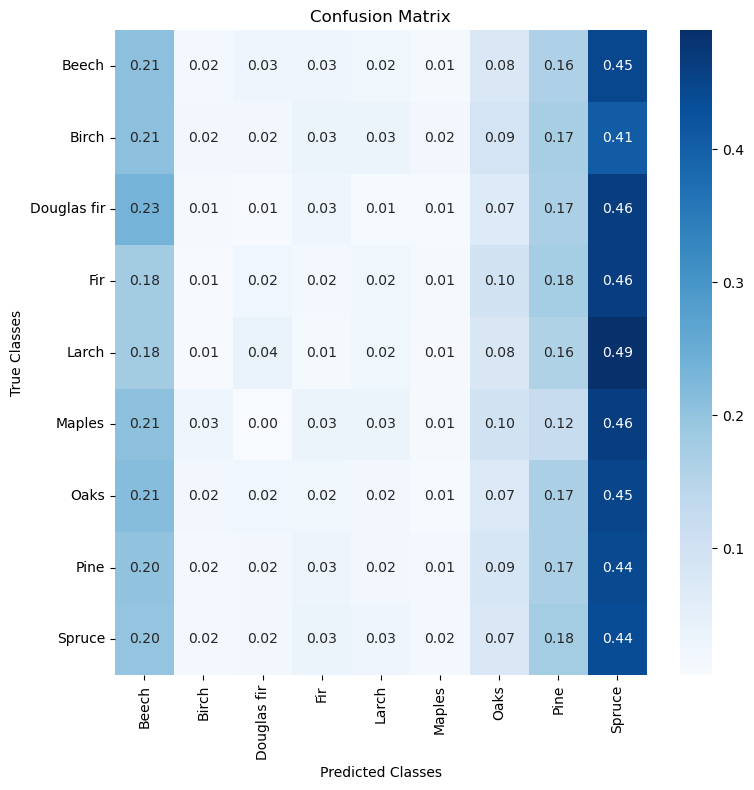

In [24]:
sf.compute_and_return_metrics(pd.Series(preds), targets_test, 'dummy_stratified')